# **Data Preprocessing Template**

# ***Importing the libraries***

In [ ]:
#Swasthika is CODING "Danger Zone" Beware NOOBS!!

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# ***Importing the dataset***

In [ ]:
# x is the attributes and y is the output
dataset = pd.read_csv('Data.csv')
x = dataset.iloc[:,:-1].values
y =  dataset.iloc[:,-1].values

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# ***Taking Care Of Missing Data***

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x[:,1:3])
#fit method to connect here with the table
x[:,1:3] = imputer.transform(x[:,1:3])
#transform to apply transformation

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# ***Encoding Categorial data***

encoding dependent variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')
# encoding catergories column (column 0) using the class OneHotEncoder  
#[0] corresponds to 0th column
#have to keep the other columns too/ i.e remainder is equal to passthrough
#z=ct.fit_transform(x)
x=np.array(ct.fit_transform(x))

#fit transform in one but it returns a matrix x as a numpy array , o making it an array 
#used this as there were more columns 

In [ ]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
#print(z)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


encoding dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


# ***Splitting the dataset into the Training set and Test set***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 50.0 83000.0]]


In [ ]:
print(y_train)

[1 1 1 0 1 0 0 1]


In [ ]:
print(y_test)

[0 0]


# ***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] =sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.fit_transform(x_test[:,3:])

In [ ]:
print(x_train)

[[0.0 1.0 0.0 0.2630675731713538 0.1238147854838185]
 [1.0 0.0 0.0 -0.25350147960148617 0.4617563176278856]
 [0.0 0.0 1.0 -1.9753983221776195 -1.5309334063940294]
 [0.0 0.0 1.0 0.05261351463427101 -1.1114197802841526]
 [1.0 0.0 0.0 1.6405850472322605 1.7202971959575162]
 [0.0 0.0 1.0 -0.08131179534387283 -0.16751412153692966]
 [1.0 0.0 0.0 0.9518263102018072 0.9861483502652316]
 [1.0 0.0 0.0 -0.5978808481167128 -0.48214934111933727]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 -1.0 -1.0]
 [0.0 1.0 0.0 1.0 1.0]]


# **Regression**

# ***Simple Linear Regression model***

In [ ]:
# step 1 : import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# step 2 : Get the dataset

dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:,:-1].values
y =  dataset.iloc[:,-1].values


# step 3 : split the dataset 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

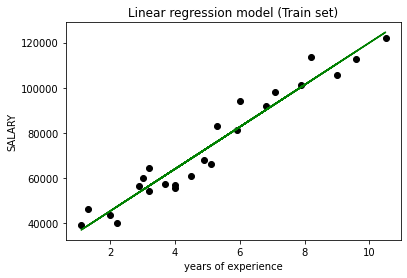

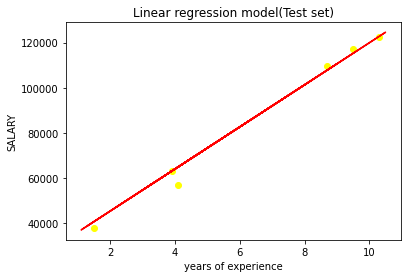

In [ ]:
# predict the results of the test examples x , i.e is we get y predicted
y_pred = regressor.predict(x_test)

#visualizing the training set results 
plt.scatter(x_train,y_train, color = 'black')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Linear regression model (Train set)')
plt.xlabel('years of experience')
plt.ylabel('SALARY')
plt.show()

#visualizing testing set results

plt.scatter(x_test,y_test, color = 'yellow')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('Linear regression model(Test set)')
plt.xlabel('years of experience')
plt.ylabel('SALARY')
plt.show()

In [ ]:
# making a single prediction 
print(regressor.predict([[12]]))

# getting the linear equation 

print(regressor.intercept_)
print(regressor.coef_)
# eqn is Salary = regressor.intercept_ + regressor.coef_ * Number Of Years

[138531.00067138]
26780.09915062818
[9312.57512673]


# ***Multiple Linear Regression***

In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:,:-1].values
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#encoding categorial data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [3])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

#Do we have to do something to avoid multivariable trap?? NO
#Sklearn will automatically find the p value / So we dont have to do anything to find the P-Value
#splitting the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
# Training the Multi linear Regression Model

#same as linear regression, it will automatically recognize. that it is an multi linear regression as it has many variables
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fit method ytains the data on the model chosen
regressor.fit(x_train,y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predicting the testing set results 
#cant plot the graph as linear regression graph as there are more than 2 variables
#all numpy library functions called by np (the alias)
y_pred = y_pred = regressor.predict(x_test) 
np.set_printoptions(precision=2)
#concatenate is an numpy function takes in tuples you want to concatenate , 2nd argument is axis = 0/1 takes vertical or horizontal concatenation   
#normally when print is used, it is written horizontally. to reshape vector n arrays use reshape function (no of rows , columns)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# ***Polynomial Regression***

In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Position_Salaries.csv') 

#leave the 1st column
x = dataset.iloc[:,1:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

# This time we have both linear n polynomial regression 
# training the linear regression modle on the whole data set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#fit method ytains the data on the model chosen
lin_reg.fit(x,y)

# As we know that these are 

# Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
#Polynomial regression of degree 2 i.e y = b0 + b1 * x^1 + b2 * x^2
poly_reg = PolynomialFeatures(degree = 9) #degree 4 works nearly perfectly
x_poly = poly_reg.fit_transform(x)
lin_reg_2 =   LinearRegression()
lin_reg_2.fit(x_poly,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

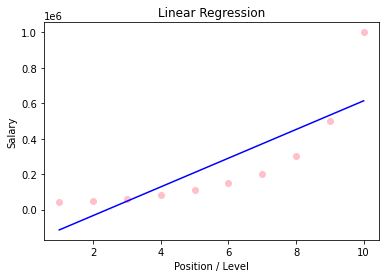

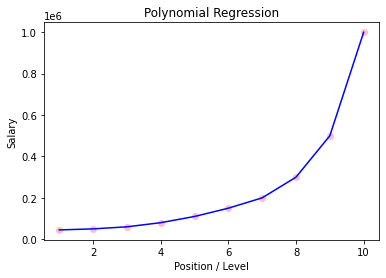

In [ ]:
# visualize linear regression model 
plt.scatter(x,y,color = 'pink')
plt.plot(x,lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position / Level')
plt.ylabel('Salary')
plt.show()

#visualize polnomial regression model 
plt.scatter(x,y,color = 'pink')
plt.plot(x,lin_reg_2.predict(x_poly), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position / Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# prediction using linear regression

lin_reg.predict([[6.5]])

array([330378.78787879])

In [ ]:
#x_poly = poly_reg.fit_transform(x)
# predction using polynomial regression

lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([172235.33640212])

# ***SUPPORT VECTOR REGRESSION (SVR)***

In [ ]:
# Have to do feature scaling as the is a specific equation for SVR
#import library
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Position_Salaries.csv') 

#leave the 1st column
x = dataset.iloc[:,1:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
#reshape the 2d array displaying vertically (Why 2d array becasue the standarized Feature scale class expects a 2D array)
#Reshaping vertically, with n rows and 1 column
y = y.reshape(len(y),1) # reshape(no. of rows, no. of colums)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
#feature scaling - Making the data within a range. (when the values are super high)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x  =sc_x.fit_transform(x) #there is no train and test set here 
#note make 2 standardScaler object one to maintain the mean/standard deviation etc of the levels and salary differently
sc_y = StandardScaler()
y =sc_y.fit_transform(y)
print(x)
print(y)
#values ranging from -3 and +3

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
# Training the SVR model on the whole dataset
#use skit learn (svm module from which svr class) 
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

# regressor = SVR(kernel = 'rbf')  check on SVM kernels (here we are using RBF kernel)
# regressor.fit(x,y) train

#reversing the scaling to get the original salary and not the scale value as the final answer
#sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) #gives scaled value
#Applying inverse transformation to go the original value


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

Text(0, 0.5, 'Salary')

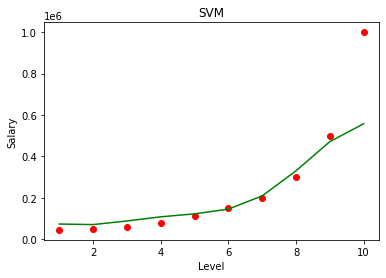

In [ ]:
#visualizing the results
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='green')
plt.title('SVM')
plt.xlabel('Level')
plt.ylabel('Salary')



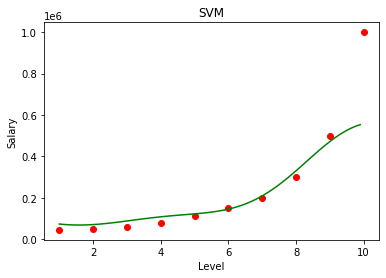

In [ ]:
#visualize SVR curve in higher resolution and smooth curve
x_grid = np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color='green')
plt.title('SVM')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# ***Decision Tree Regression***

In [ ]:
#Note:  Decision Tree Regression is suitable for multidimensional data as it splits the data, i.e data with many attributes

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Position_Salaries.csv') 

#leave the 1st column
x = dataset.iloc[:,1:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
#Training the decision tree regression modle on the whole dataset

#No future scaling required for both decision tree and random forest because they are not some equations, spilts of data
#Taking care of missing data or encoding might be required
#Only visualizing the regression tree in higher resolution

from sklearn.tree import DecisionTreeRegressor #predicts continous numerical value whereas DecisionTreeClassifier predicts a category
regressor = DecisionTreeRegressor(random_state = 0) #random factors are happening which may effect the values
regressor.fit(x,y)

#predicting a new result 
regressor.predict([[6.5]])

array([150000.])

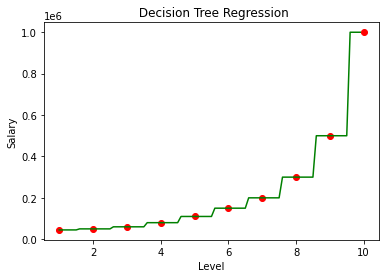

In [ ]:
#High Resolution Visualization the decision tree regression results
x_grid = np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='green')
plt.title(' Decision Tree Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Text(0, 0.5, 'Salary')

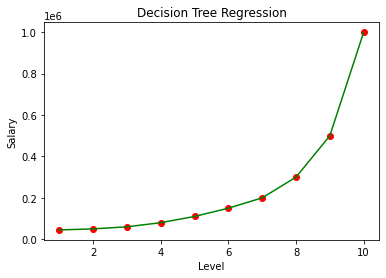

In [ ]:
#Low Resolution Visualization
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='green')
plt.title('Decision Tree Regression')
plt.xlabel('Level')
plt.ylabel('Salary')

In [ ]:
#Making Decision Tree Regression model for higher resolution data
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Position_Salaries.csv') 

#leave the 1st column
x = dataset.iloc[:,1:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values #These may vary depending on the data
print(x)
print(y)
#use missing value tool
#Any categorical data -  Apply Encoding,
#Can split data
#no future scaling

from sklearn.tree import DecisionTreeRegressor #predicts continous numerical value whereas DecisionTreeClassifier predicts a category
regressor = DecisionTreeRegressor(random_state = 0) #random factors are happening which may effect the values
regressor.fit(x,y)

#predicting a new result 
regressor.predict([[6.5]]) 
#dataset with mutiple features    regressor.predict([[a,b,c]]) 

# ***Random Forest Regression***

In [ ]:
#Random forest is a version of Essemble learning(Essemble learning - Take same or different algorithms multiple times and create something much more powerful)
#step1 : pick a random k data points from the training set
#step2 : Build a decision tree based on these k data points
#step 3: choose the number of N trees you want to build in steps 1 and step 2
#For a new data point, make each one of your N tree predict the value of Y to for the data point in question, and assign the new data point the average across all of the predicted Y values

#import library
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Position_Salaries.csv') 

#leave the 1st column
x = dataset.iloc[:,1:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#Training the Random Forest Regression Model on the whole dataset
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 10 , random_state = 0) #very important parameter
#number of trees is given here given as n_estimators = 10 
regressor.fit(x,y) #Basically training
regressor.predict([[6.5]])

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


array([167000.])

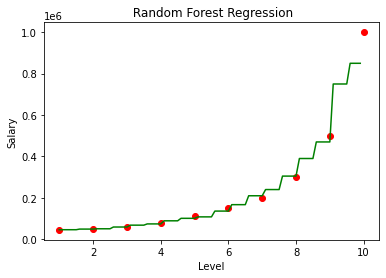

In [ ]:
#Visualizing the Random Forest Regression results (High resolution)
x_grid = np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='green')
plt.title(' Random Forest Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# ***R Squared Intuition and Adjusted R^2***

In [ ]:
#Check a youtube video for better understanding

#R squared Intuition 


#(Sum of Squares) SSres = SUM (yi - yi^)2 
# SStotal = SStot = SUM(yi - yavg)2
#minimize sum of the squares, i.e os trying to fit the best fitting line.
#R^2 = 1 - SSres/SStot (R square can be negative, i.e model is broken. closer its to 1 its better)
#Basically tells us how good our model is fitted to the data
#Bigger the R^2 the better i.e closer it is to 1, its better

# Adjusted R^2

#Now the problem arrives when the number of parameters are more, With the 3rd vairable did the x become better ?? 
#R^2 never decrease, only increases 
# Adj R^2 = 1 - (1-R^2)(n-11/n-p-1)
# p - number of regressor , n - Sample size

# ***Which Regression Model to use tool on any given data set***

In [ ]:
#Making a generic template that you can quickly compare the best regression model
#checking the precision and accuracy
#try all the models and the performance is measured by co-efficient if R^2 (Compare using R^2)
# sklearn.metrics use this to find the best one

# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

# **CLASSIFICATION**

# ***Logistic Regression Model***

In [ ]:
#Think of it as a probability of an event happening

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)



[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

print(x_test)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [ ]:
#Training the logistic model on the training dataset

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
#in the output you can see c the smaller the value of c the better 

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
#similar to multiple linear regression
# predicting the testing set results 
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [ ]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#65 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#24 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#3 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#8 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#89 correct entries 65 + 24 = 89 in terms of 100

[[65  3]
 [ 8 24]]


0.89

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


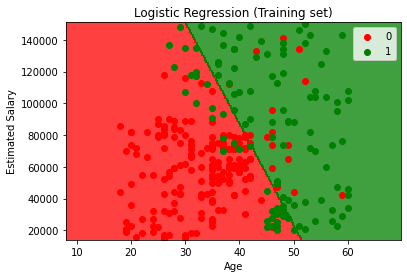

In [ ]:
#code is very advanced and might not use it often might be never!
#visualizing training set
#green region is where they bought n red where it wasnt bought 
#same color as region is an example of correct prediction
#the prediction boundary, is a straight line as its linear classifier, but for non linear model it wont be a straight line.
#for better prediction the prediction boundary shouln't be a straight line, optimally a prediction curve, which we will get in non linear classification
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


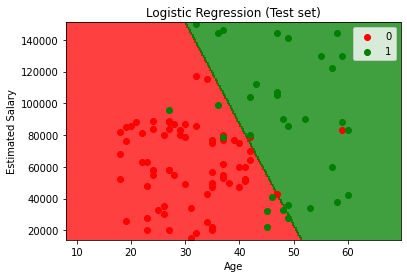

In [ ]:
#visualizing test set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# #Check on udemy for free course named - Logistic Regression Practical Case Study :)

# ***KNN ALGORITHM***

In [ ]:
#step by step rule for knn
#choose the no of neighbors (K) default value is 5
#take the knn data points according to their euclidian distance can use other distances also manhatten distance etc
#count no of data point in each category 
#assign new data points to the neighbours with most neighbours 
#euclidian distance d = root((x1-x2)^2 + (y1 - y2)^2)

#step is same as logistic regression, just while testing we need to change the classifier

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

print(x_test)




[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
#Training the knn model on the training dataset
#uniform value of weight is default
#algo = auto, fits best   
#uses classic euclidian distance

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
#in the output you can see c the smaller the value of c the better 

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
# predicting the testing set results 
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#64 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#29 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#4 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#3 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#93 correct entries 64 + 29 = 93 in terms of 100


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[64  4]
 [ 3 29]]


0.93

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


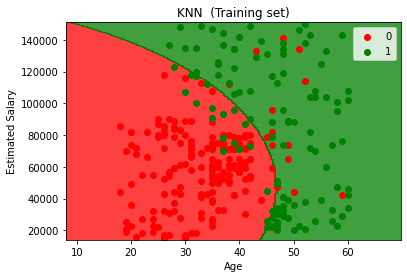

In [ ]:
#code is very advanced and might not use it often might be never!
#visualizing training set
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#takes time, Note the model is not having a linear line but cursive covering more data points than logistic regression model 
#you mightnot be able to run it on COLLAB as it needs more RAM 
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN  (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


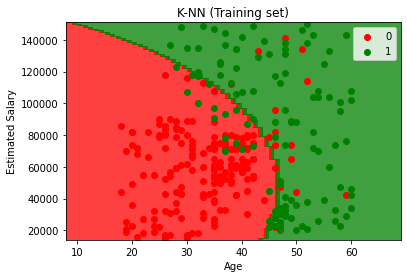

In [ ]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Support Vector Machine (SVM)***

In [ ]:
#finding the best line that seperates, so we find maximum margin which gives us the line which is equidistant from 2 lines
#the 2 lines formed are called support vector points
#most general word is vector 
#step by step rule for knn
#choose the no of neighbors (K) default value is 5
#take the knn data points according to their euclidian distance can use other distances also manhatten distance etc
#count no of data point in each category 
#assign new data points to the neighbours with most neighbours 
#euclidian distance d = root((x1-x2)^2 + (y1 - y2)^2)

#step is same as logistic regression, just while testing we need to change the classifier

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

print(x_test)


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
#Training the logistic model on the training dataset
# kernel trick, a method of using a linear classifier to solve a non-linear problem.
#The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.
#can choose both linearsvm or kernal one
#INPUT TAKES IN KERNAL i.e either linear or a non linear kernal
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
# predicting the testing set results 
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#66 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#24 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#2 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#8 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#90 correct entries 66 + 24 = 90 in terms of 100

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]
[[66  2]
 [ 8 24]]


0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


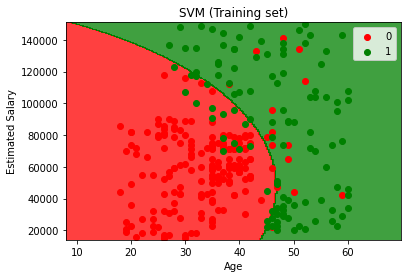

In [ ]:

#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


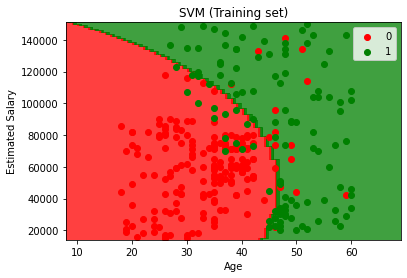

In [ ]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Kernel SVM MODEL***

In [ ]:
#Non linearly seperable data
#but the machine assumes its linearly seperable
#helps us choose optimal decision boundary, so we have to develop an algo for this case in which we can't draw a line and seperate these
#learn how to map data to a higher dimension, Apply some kind of mapping function
#the kernal trick- check on gausian kernal function
#for more complex use 2 complex function. 
#types of kernel functions - 


In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
#in the output you can see c the smaller the value of c the better 

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#64 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#29 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#4 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#3 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#93 correct entries 64 + 29 = 90 in terms of 100

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[64  4]
 [ 3 29]]


0.93

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


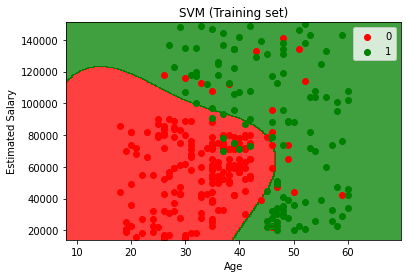

In [ ]:
#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


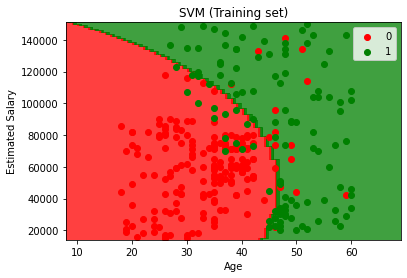

In [ ]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Naive Bayes***

In [ ]:
#its called naive because these theorems include individual assumptions, which are often not correct. 
#Bayes theorem - Bayes' theorem states that the conditional probability of an event, X, given the occurrence of another event, Y, is equal to the product of the likelihood of Y given X and the probability of X 
#formula - P ( happens | X) = P ( X ∣ happens ) P ( Happens )/ P ( X ) .
#here we compare two probailities of an event happening and not happening, we can see that the denominator will be same and can ignore it
#naives bayes is probabilistic class gives posterior probability,
#Prior probability, in Bayesian statistical inference, is the probability of an event before new data is collected. 
#a marginal likelihood function, or integrated likelihood, is a likelihood function in which some parameter variables have been marginalized.


In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#65 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#25 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#3 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#7 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#93 correct entries 65 + 25 = 90 in terms of 100

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[65  3]
 [ 7 25]]


0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


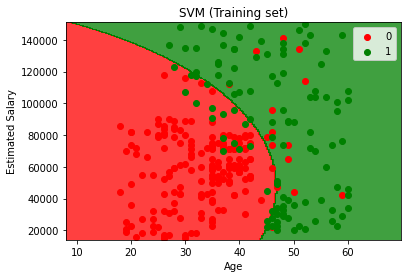

In [ ]:
#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


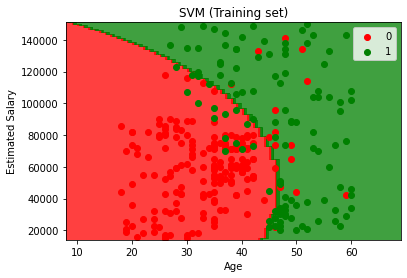

In [ ]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Decision Tree***

In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#62 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#29 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#6 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#3 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#91 correct entries 62 + 29 = 91 in terms of 100

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[62  6]
 [ 3 29]]


0.91

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


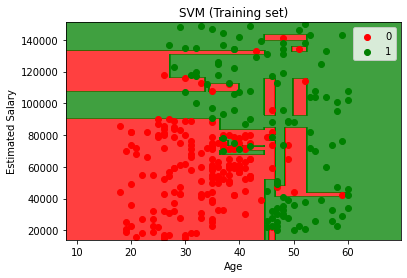

In [ ]:
#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


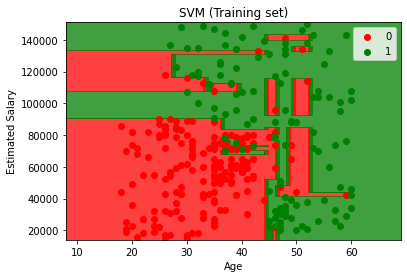

In [ ]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Random Forest Classification***

In [ ]:
#what's ensemble learning -
#random forest uses many decision tree's
#steps 
#pick a random k data point on the data set
#build decision for some of the data set
#choose n number of trees from 1st 2 steps
#make each datapoint predict the category to which the data belongs to majority of the prediction output

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10 ,criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

#predicting new result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [ ]:
y_pred = classifier.predict(x_test)
#as its 0 or 1 we need not need precision
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

#finding accuracy
accuracy_score(y_test,y_pred)

#63 correct prediction of class 0 meaning customer of the test set who didnt buy the SUV 
#28 correct prediction of the class 1  meaning customer of the test set who bought the SUV 
#5 incorrect prediction of class 1 meaning the customer who actually bought but were predicted not to
#4 incorrect prediction of class 0 meaning the customer who didnt actually bought but were predicted they had got it

#91 correct entries 63 + 28 = 91 in terms of 100

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[63  5]
 [ 4 28]]


0.91

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


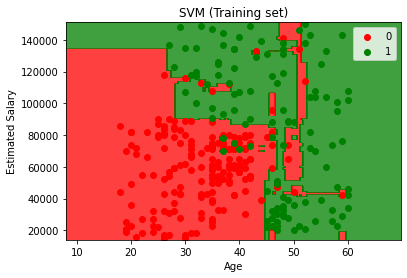

In [ ]:
#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


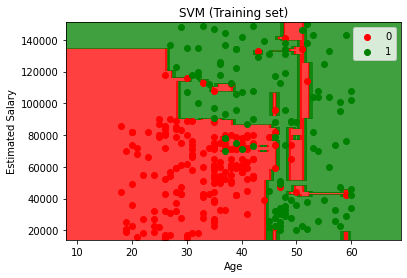

In [ ]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Best Model / Max Efficiency***

In [ ]:
#use the following template to analyse breast cancer data to find the best classification
#decision tree wins for breast cancer example
#things to know about
#false positive - 
#false negative - 
#confusion matrix - (actual, predicted)
#accuracy paradox - 
#CAP curve -(Cummulative accuracy profile)
#CAP curve analysis
#receiver operating characteristics

# **Clustering**

# ***K- Means Clustering***

In [ ]:
#clustering is basically identifying patterns in data
#steps

#1 Select the number of clusters k
#2 random k points that can be centroid of the points (not really the data points)
#3 assign each datapoint to the closest centroid - that form k cluster
#4 compute n place each new centroid
#5 reassign the data point to new closest centroid, if assignment takes place den go to step 4. else finalize te cluster

# your model is ready

# Go through k means ++ algorithm

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Mall_Customers.csv') 

#Check the dataset, here last column can be used in understandong the data
x = dataset.iloc[:,[3,4]].values  #customer id isnt needed as its a random no 
# 3,4 becasue during visualization the final graph will be better in 2D, and as the last 2 columns have higher levels of sense when it comes to spedning
print(x)



[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

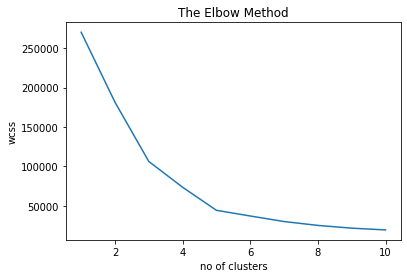

In [ ]:
#use the elbow method to find the number of clusters
from sklearn.cluster import KMeans
#not class of KMeans directly
wcss = []
for i in range(1 ,11): # includes 1 to 10 , 11 is excluded
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #basically trying to minimiza the distance
plt.plot(range(1 ,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#training the k means model on the dataset
#from the graph we observe that the graph decreases slowly after the number of cluster is = 5, which means 5 is the optimum number of clusters needed
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x) #fits  and predicts and returns the value
print(y_kmeans)
# 5 clusters 0 - 4 , 1st customer belongs to cluster 3

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


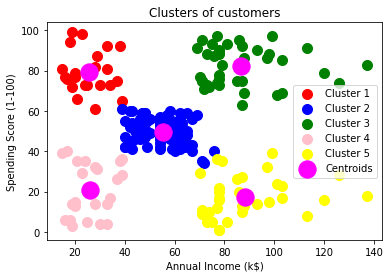

In [ ]:
#visualizing the clusters
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s= 100, c = 'red', label = 'Cluster 1') #scattering cluster of index 0 , y_kmeans == 0 means all the ones corresponding to the cluster 0 and plot against income and next plost against purchase course
#(x,y) = (cluster 0 with income , cluster 0 with spending score), s = size, 
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s= 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s= 100, c = 'green', label = 'Cluster 3') 
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1], s= 100, c = 'pink', label = 'Cluster 4') 
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1], s= 100, c = 'yellow', label = 'Cluster 5') 

#pasting the centroid of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() #for the chart at the right telling you which color belongs to what
plt.show()

# ***Hierarchial Clustering***

In [ ]:
# 2 types 
#1 agglometric (make each data point as a single cluster, nearest data point, take 2 data points make them n-1 clusters, take 2 closest cluster and make n-2 cluster, repeat till there's one cluster) 
#2 and Divisive
#learn about dendrogram and its construction
# ways to calculate distance effects the ooutput of our model
#closest point distance
#furtherest
#average
#centroid

# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Mall_Customers.csv') 

x = dataset.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

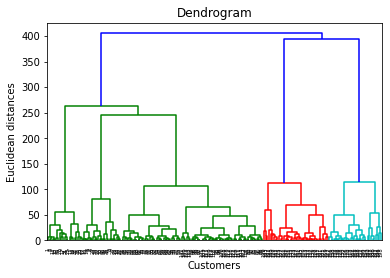

In [ ]:
#build a dendogram model
import scipy.cluster.hierarchy as sch # same as from import ..
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward')) #getting the dendogram function , ward used to minimize variance check, about it on wiki
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
#Training the Hierarchieal model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') # n_clusters was 5 according to dendrogram
y_hc = hc.fit_predict(x)
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


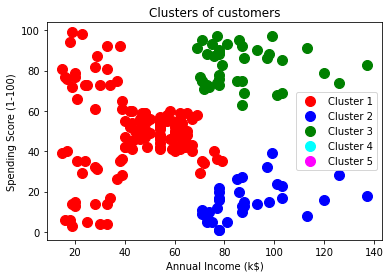

In [ ]:
#Visualizing the hierarcheal model
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **Association Rule Learning**

# ***Apriori***

In [ ]:
#Installing apriori packages from web as no library has it
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=162c3eaf6fc071d1f0c45a8e2d5b75a7ecee5878eb760408dcaa62af58e0a0f7
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
# Story of people buying In a convinient store beer + diaper (that came from data)! How to get to know this
# A person who did this did something else
# person who watched movie 1 watched movie 2
# Apriori - 3 parts - support (frequency of item/ grp of items being brought), confidence(how often its brought together), lift(strength of the rule formed abt the association).

# steps
#1 minimum support and confidence
#2 take the subset having support more than min support
#3 take rules of this subset having confidence more than min confidence
#4 sort the rules by decreasing lift 

#eg recomandation systems have small part of it, business owner

In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None) 

#apriori function has a different format than pandas, it takes in list. 
transactions = []

#populating the list
for i in range(0, 7501):
  transactions.append([str (dataset.values[i,j]) for j in range(0, 20)]) #list in a list

In [ ]:
#training the apriori model on the dataset
#uploading the apriori function
from apyori import apriori

rules = apriori(transactions = transactions,min_support = 0.003 , min_confidence =  0.2 , min_lift = 3, min_length =2, max_length = 2) # 7 * 3 / 7501 = support



In [ ]:
#visualizing the results
results = list (rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
#putting results in pandas data frame

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
#displaying the result non sorted 
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [ ]:
#Displaying the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


# ***Eclat***

In [ ]:
#movies, books recommendation etc, easier than apriori. here we are going using sets and not rules
# here we only have support = transaction containing x / no of transactions
!pip install apyori

In [ ]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None) 

#apriori function has a different format than pandas, it takes in list. 
transactions = []

#populating the list
for i in range(0, 7501):
  transactions.append([str (dataset.values[i,j]) for j in range(0, 20)]) #list in a list

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

#visualizing the results
results = list (rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
#putting results in pandas data frame

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])

In [ ]:
#Displaying the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200


# **Reinforcement**

In [ ]:
# What is multi armed bandit problem ?
#upper confident bound

# ***Upper Confidence Bound***

In [ ]:
#deterministic algo
#steps check about them
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Ads_CTR_Optimisation.csv') 

In [ ]:
#impliment of UCB
#there are 10 ads
import math
N = 10000 #try varing and check :) 

d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward




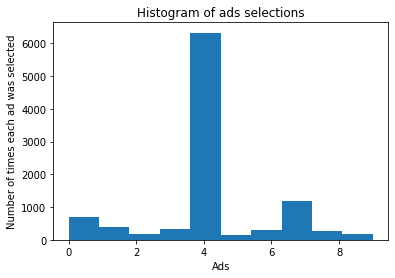

In [ ]:
#Visualizing the results 
plt.hist(ads_selected) #histogram
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# ***Thompson Sampling***

In [ ]:
#probablistic algorithm
#ucb VS thompson sampling
#ucb - deterministic algo, needs update every round(isnt easy for web sites where there are 10000/sec++ clicks etc), 
#thompson - probablistic algo, delayed feedback is ok,

In [ ]:
#steps check about them
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Ads_CTR_Optimisation.csv') 

In [ ]:
#implimenting thompson sampling
import random
N = 10000 #total no of user , try 500 also
d = 10 #no of ads
ads_selected = [] #clicks
numbers_of_rewards_1 = [0] * d # each time a ad getting reward 1
numbers_of_rewards_0 = [0] * d # each time a ad getting reward 0
total_reward = 0 #total reward (accumulated reward)
for n in range(0, N):  # n = 10000 rounds who watch ad
  ad = 0   # ad which will be the index of the ad  
  max_random = 0 #maximum of the random
  for i in range(0, d):   #iterate from different ads , d  = no of ads
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)  #random draw from beta variation
    if (random_beta > max_random): #max random will update in each iteration
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

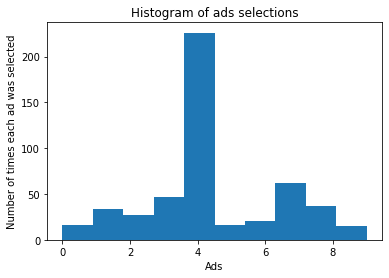

In [ ]:
#Visualizing the results 
plt.hist(ads_selected) #histogram
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# **Natural Language Processing**

In [ ]:
#helps to built chat bot etc
#types of NLP, deep learning, DLNP, Seq2Seq
#classical 
#deep learning model
#if else rules, speech recognisition, Bag of words model, CNN for textual recognistion, 
#Bag of words - sos, eos, special words,  
#sentimental anaylsis example - tsv format, 1 means customer liked it.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter = '\t', quoting = 3)  #can open tsv file using same command just add delimiter, quoting =3 means to ignore all ' in the file

#cleaning the texts
import re    #rep library used to simply but not steming
import nltk   # remove irrevelent words like the , a, he, she etc
nltk.download('stopwords')   #downloading all stop words
from nltk.corpus import stopwords   #importing the stop words
from nltk.stem.porter import PorterStemmer  #apply steming using, i.e is only the main content . i loved it -- loved i.e positive feedback
corpus = []  #all different reviews 
for i in range(0, 1000):  #cleaning process and after cleaning add it to corpus, 1000 reviews
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # element not a letter replaced by space , reaching the text iloc also works, but review []  is also correct
  review = review.lower() # converted to lower 
  review = review.split() # prepare for steming, split the words into different words
  ps = PorterStemmer() #stemming class
  all_stopwords = stopwords.words('english') #
  all_stopwords.remove('not') #not include the not word in the stopword, as its a negative statement
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #iterate to all the words, dont include stop words,  
  review = ' '.join(review) #join the words with space after removing everything unwanted
  corpus.append(review)


print(corpus)  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',

In [ ]:
#creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features = 1500) # max number of frequent repeating words 
X = cv.fit_transform(corpus).toarray() # fit and transforms the and puts in the array
y = dataset.iloc[:, -1].values #dependend variable i.e is the last column of our dataset

len(X[0])

1500

In [ ]:
#splitting the dataset into triaining 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#training the naive base model on training set 
#try with other model 

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#predicting the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [ ]:
#making the confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

# **Deep Learning**

In [ ]:
#Geofry Hinton - Father of DL (Works at GOOGLE)
#Mimicing how a brain works
#feature scaling is a must

# ***Artificial Neural Networks***

In [ ]:
#Neuron - How to recreate a neuron?, weights, gets weighted sum when it pases to the next where activation function being applied
#Activation Function - different types of function - threshold, sigmoid(mostly used for probability), rectifier(most useful), hyperbolic tangeant
#How they work - activation function works only for a certain... attributes there, check an example.
#How they learn - perceptron, Update the weights checking the difference between y actual and y predicted and adjusted using back propogation
#Gradient Descent - minimize the errors using brute force(its one way) but when there are a lot of networks, local minimum and global min 
#Stochastic Gradient Descent -random, dosent require entire neural network to be correct, adjusting weights every time, avoids local minimum, its faster as it dosent need to load data 
#Batch Gradient Descent - Dterministic
#Back Propagation

#data - biz problem - risk of customer with highest risk of leaving

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.__version__

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values #check the features which will effect the data

print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [ ]:
#no missing data so we dont have to work on it
#encoding the categorical(string) data (country and gender)

#gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#country
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train)
print(X_test)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]
[[0.0 0.0 1.0 ... 1 0 163830.64]
 [0.0 1.0 0.0 ... 1 1 57098.0]
 [1.0 0.0 0.0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]
[[0.0 1.0 0.0 ... 1 1 192852.67]
 [1.0 0.0 0.0 ... 1 0 128702.1]
 [0.0 0.0 1.0 ... 1 1 75732.25]
 ...
 [0.0 0.0 1.0 ... 1 0 141533.19]
 [0.0 1.0 0.0 ... 1 1 11276.48]
 [0.0 1.0 0.0 ... 1 0 192950.6]]


In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#initialising ann
ann = tf.keras.models.Sequential()

#you can experiment any number of layers, hidden layer should always have relu activation function

#adding input and 1st hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#adding 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #probability of the output will also be given, 
#

In [ ]:
#training the ann

#compiling the ann
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #compare and update the weight using the optimiser
#as the output is binary(0/1) so binary_crossentropy else use categorical

#training the ann on training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100) #batch learning is more effcient, so that we can compare, epochs certain amount of epochs


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4857 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8006
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8191
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8239
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8276
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8282
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8291
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3943 - accura

In [ ]:
#single prediction 
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
#format for the predict is 2d array , for female and germany we had to enter the encoding, 
#male =1, female =0
#change the scaling as feature scaling was applied 
# as we have applied sigmoid function the output is the probability is output 

#predicting the test results 
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#as the prediction is the probability to make it binary its >0.5
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[False]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) 
#out of 100 86 were predicted to stay

[[1507   88]
 [ 192  213]]


0.86

# ***Convolutional Neural Networks***

In [ ]:
#cnn- facebook tagging image by identifying pictures
# Yann Lecun - works at FB - student of Geofry Hinton 
#check paper on Jianxin
#convolutional operation - its combine integration of 2 functions. there is feature detector matrix and we compare. each match stride. Feature detector
#ReLU layer - we think that we might find something linear, relu removes all black. helps in introducing non linearlity , check paper by Kaiming He
#Pooling - mean pooling , max , sum pooling. -  basically reduce the number of parameters - paper by Dominik Scherer
#flattening - converting to `1d array by inputing to other layer
#full connection -
#soft max - making values between 0 - 1 . squashes it between 0 - 1. 
#cross entropy -
# Adit Deshpande - paper - 9 different CNN
# Rob DiPietro - paper , Peter Rolents

In [ ]:
#Importing libraries  
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.5.0'

In [ ]:
#preprosesing train data 
#cant run in google collab as the dataset is too big
#apply geometrical transformation to modify the images to avoid fit (over learn)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#applys feature scaling (0-255) pixels and other transformation to prevent over fitting
#put the correct path
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

#connecting to the original training set, resizing to reduce the computation

#preprosing testing data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

#binary out come(cat or dog), standard batch size = 32

In [ ]:
#creating cnn
#initialising cnn
cnn = tf.keras.models.Sequential() #sequential layers

#convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) # con 2d class,no of filter/feature detoctors 
#kernal is the no of rows, input shape 64 64 3 , coloured images  

#pooling 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#pooled feature map , pool size = frame size 2*2 frame , strides = max 

#second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#

#flattening
cnn.add(tf.keras.layers.Flatten())
#all the layers in 1 and flattened to one

#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# 1 as its binary


In [ ]:
#Training CNN

#compiling cnn
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#adam for stochastic gradient

#Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)



NameError: ignored

In [ ]:
#making a single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)  

# **Dimensionality Reduction**

# ***Principal Component Analysis***

In [1]:
#used in -  Noise filtering, Visualization, Feature Extraction, Stock Market Predictions, Gene Data Analysis

#identifys relation between variables (patterns)
#business case study - Customer recoomendation system on wine.

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Wine.csv') 
x = dataset.iloc[:,:-1].values
y =  dataset.iloc[:,-1].values

#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] =sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.fit_transform(x_test[:,3:])

In [2]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test) #just transfomr to avoid information lekage 

In [4]:
#Training with Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


0.9722222222222222

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


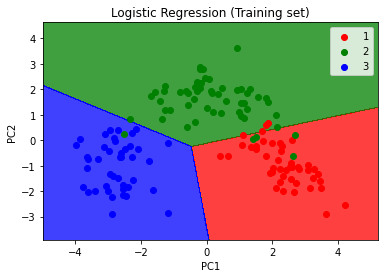

In [5]:
#Visualizing Train Set
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


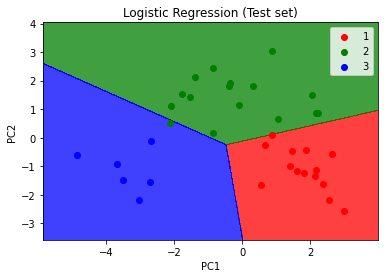

In [6]:
#Visualizing Test Set
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# ***Linear Discriminant Analysis***

In [7]:
#Common Dimension Reduction Technique
#used in preprocessing stage of data set with a goal of reducing onto a lower dimensional space
#How LDA and PCA differs - LDA maximises the seperation bewteen multiple classes

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Wine.csv') 
x = dataset.iloc[:,:-1].values
y =  dataset.iloc[:,-1].values

#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] =sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.fit_transform(x_test[:,3:])


In [9]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train, y_train) #both x_train and the dependant variable y_train
x_test = lda.transform(x_test)

In [10]:
#Training with Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


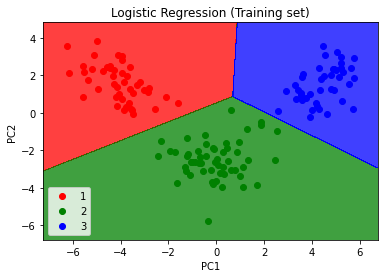

In [11]:
#Visualizing Train Set
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


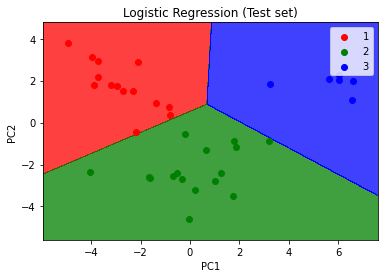

In [12]:
#Visualizing Test Set
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# ***Kernal PCA***

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Wine.csv') 
x = dataset.iloc[:,:-1].values
y =  dataset.iloc[:,-1].values

#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [31]:
#Applying Kernal PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [32]:
#Training with Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


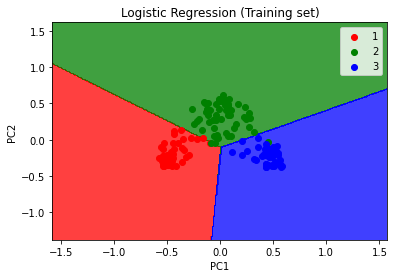

In [33]:
#Visualizing Train Set
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


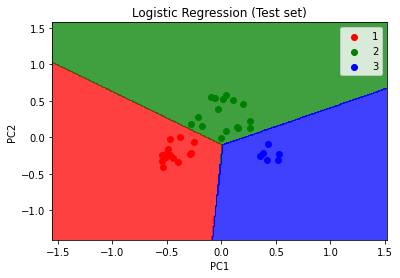

In [34]:
#Visualizing Test Set
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# **Model Selection AND Boosting**

# ***K-Fold Cross Validation***

In [35]:
#Measures perfromance

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training Kernal SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

0.93

In [36]:
#Apply K fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


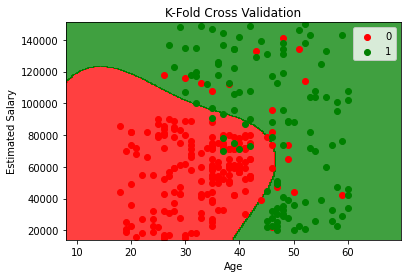

In [37]:

#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Fold Cross Validation')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


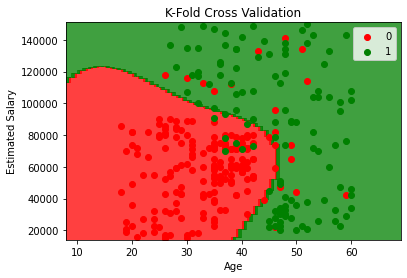

In [25]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Fold Cross Validation')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***Grid Search***

In [45]:
#find best version of model with the given variables

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#open the document
dataset = pd.read_csv('Social_Network_Ads.csv') 

#leave the 1st column
x = dataset.iloc[:,:-1].values #didnt include the 1st column
y =  dataset.iloc[:,-1].values
print(x)
print(y)

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


#feature scaling -  It isnt really needed, But applying it will increase training performance improving final prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#last column is already in terms of zeros and ones 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training Kernal SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

0.93

In [47]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


In [49]:
#Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#combinations of parameters you want to test
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.67 %
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


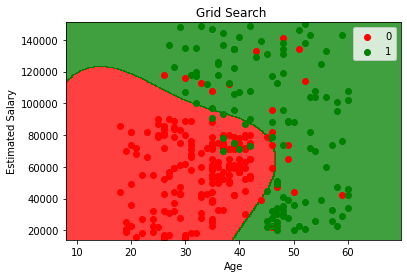

In [50]:

#visualizing training set

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Grid Search ')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


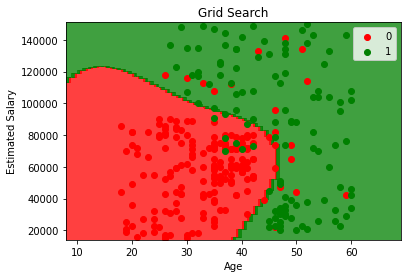

In [51]:
#visualizing test set result
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Grid Search')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ***XGBoost***

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#open the document
#Dataset on the characteristics of a tumor
dataset = pd.read_csv('Data1.csv')

#leave the 1st column
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#splitting the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


In [65]:
#Training on XGBoost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
#Making Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 0 50]]


0.9781021897810219

In [67]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.53 %
Standard Deviation: 2.07 %
